# Data Loading And Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
null=df.isnull()
for c in null.columns:
    print(null[c].value_counts())
    

False    21613
Name: date, dtype: int64
False    21613
Name: price, dtype: int64
False    21600
True        13
Name: bedrooms, dtype: int64
False    21603
True        10
Name: bathrooms, dtype: int64
False    21613
Name: sqft_living, dtype: int64
False    21613
Name: sqft_lot, dtype: int64
False    21613
Name: floors, dtype: int64
False    21613
Name: waterfront, dtype: int64
False    21613
Name: view, dtype: int64
False    21613
Name: condition, dtype: int64
False    21613
Name: grade, dtype: int64
False    21613
Name: sqft_above, dtype: int64
False    21613
Name: sqft_basement, dtype: int64
False    21613
Name: yr_built, dtype: int64
False    21613
Name: yr_renovated, dtype: int64
False    21613
Name: zipcode, dtype: int64
False    21613
Name: lat, dtype: int64
False    21613
Name: long, dtype: int64
False    21613
Name: sqft_living15, dtype: int64
False    21613
Name: sqft_lot15, dtype: int64


In [6]:
null=df.isnull().sum()
null

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [7]:
bedmean=df.bedrooms.mean()
df.replace(np.nan,bedmean,inplace=True)
bathmean=df.bathrooms.mean()
df.replace(np.nan,bathmean,inplace=True)
null=df.isnull().sum()
null

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Data Wrangling

In [8]:
df.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

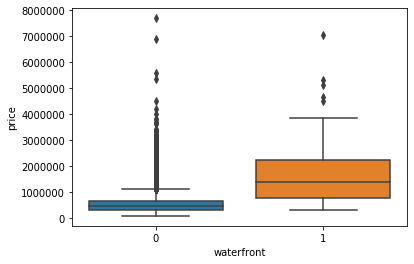

In [9]:
sns.boxplot(data=df,x="waterfront",y="price")

In [10]:
#Removing Outliners
df=df[df['price']<6000000]

In [11]:
df.corr()['price'].sort_values()

zipcode         -0.053131
long             0.023010
condition        0.037436
yr_built         0.057279
sqft_lot15       0.083260
sqft_lot         0.090748
yr_renovated     0.121354
floors           0.259672
waterfront       0.264021
bedrooms         0.309875
lat              0.312902
sqft_basement    0.320146
view             0.397859
bathrooms        0.523550
sqft_living15    0.591676
sqft_above       0.602117
grade            0.673801
sqft_living      0.698785
price            1.000000
Name: price, dtype: float64

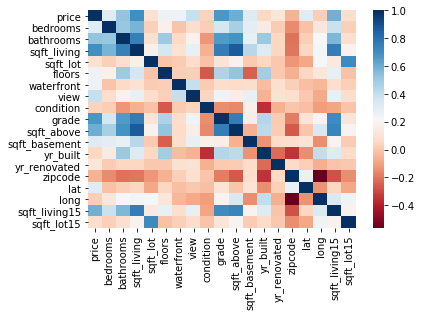

In [12]:
sns.heatmap(df.corr(),cmap='RdBu')

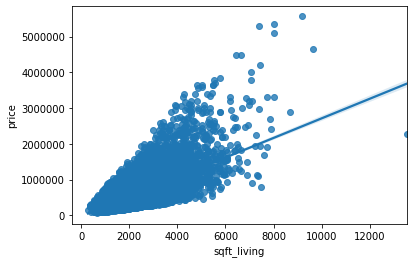

In [13]:
sns.regplot(x="sqft_living", y='price',data=df)

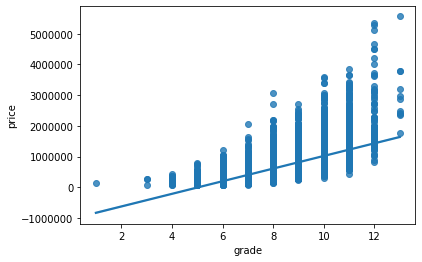

In [14]:
sns.regplot(x="grade", y='price',data=df)

# Model 1 - Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
Z=df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
X=df[["sqft_living"]]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [17]:
reg=LinearRegression()
model1=reg.fit(X_train, y_train)

In [18]:
model1.score(X_train, y_train)

0.48837179272331244

In [19]:
model1.score(X_test, y_test)

0.4872755201792185

In [20]:
coef=model1.coef_
intercept=model1.intercept_
coef

array([278.35643064])

In [21]:
intercept

-37999.49955778604

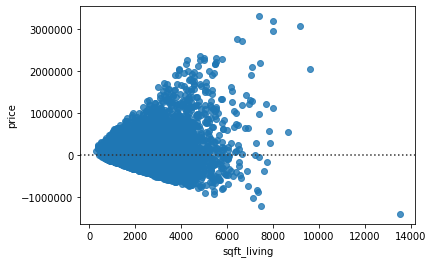

In [22]:
sns.residplot(df['sqft_living'],df['price'])

In [23]:
yhat1=model1.predict(X)
yhat1

array([290461.08860144, 677376.52719578, 176334.95203764, ...,
       245924.05969849, 407370.78947167, 245924.05969849])

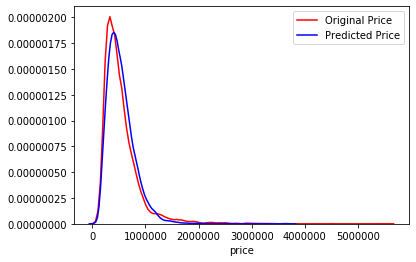

In [24]:
axl=sns.distplot(df['price'],hist=False,color="r",label="Original Price")
sns.distplot(yhat1,hist=False,color="b",label="Predicted Price",ax=axl)

# Model 2 - Multiple Regression

In [25]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [26]:
scale=StandardScaler()
scale.fit(X)
x_scale=scale.transform(Z)

In [27]:
x_scale

array([[-2.27612178, -2.27721728, -2.22516894, ..., -0.98453182,
        -2.2695488 , -0.98453182],
       [-2.27502628, -2.27721728, -2.2249391 , ...,  0.10000937,
        -2.2695488 ,  0.53820783],
       [-2.27612178, -2.27721728, -2.22492059, ..., -1.43368524,
        -2.2706443 , -1.43368524],
       ...,
       [-2.27502628, -2.27721728, -2.22507779, ..., -1.1598112 ,
        -2.2695488 , -1.1598112 ],
       [-2.27502628, -2.27721728, -2.22514341, ..., -0.52442344,
        -2.26845331, -0.52442344],
       [-2.27502628, -2.27721728, -2.22507812, ..., -1.1598112 ,
        -2.2695488 , -1.1598112 ]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=60)
reg=LinearRegression()
model2=reg.fit(X_train, y_train)

In [29]:
model2.score(X_train,y_train)

0.6634594752808702

In [30]:
model2.score(X_test,y_test)

0.6517239246646973

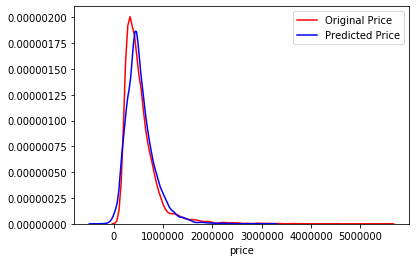

In [31]:
yhat2=model2.predict(x_scale)
axl=sns.distplot(df['price'],hist=False,color="r",label="Original Price")
sns.distplot(yhat2,hist=False,color="b",label="Predicted Price",ax=axl)

# Model 3 - Polynomial Regression

In [ ]:
train_score=[]
test_score=[]
degree=np.arange(1,10,1)
for d in degree:
    pr=PolynomialFeatures(degree=d)
    X_pr=pr.fit_transform(x_scale)
    X_train, X_test, y_train, y_test = train_test_split(X_pr, y, test_size=0.2, random_state=60)
    reg=LinearRegression()
    model3=reg.fit(X_train, y_train)
    train_score.append(["degree= "+str(degree),model3.score(X_train,y_train)])
    test_score.append(["degree= "+str(degree),model3.score(X_test,y_test)])
    

In [ ]:
train_score

In [ ]:
test_score

In [32]:
#degree for best model is d=3
d=3
pr=PolynomialFeatures(degree=d)
X_pr=pr.fit_transform(x_scale)
X_train, X_test, y_train, y_test = train_test_split(X_pr, y, test_size=0.2, random_state=60)
reg=LinearRegression()
model3=reg.fit(X_train, y_train)

In [33]:
model3.score(X_pr,y)

0.7918007408227141

In [34]:
yhat3=model3.predict(X_pr)
yhat3

array([333216., 554528., 466208., ..., 368608., 440992., 368416.])

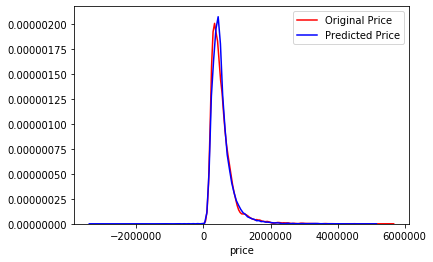

In [35]:
axl=sns.distplot(df['price'],hist=False,color="r",label="Original Price")
sns.distplot(yhat3,hist=False,color="b",label="Predicted Price",ax=axl)

# Model 4 - Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [37]:
train_score=[]
test_score=[]
alpha=[0.001,0.01 , 0.1 , 1 , 5 , 10 , 50 , 100]
for a in alpha:
    X_train, X_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=60)
    m4=Lasso(a)
    model4=m4.fit(X_train, y_train)
    train_score.append(["alpha= "+str(a),model4.score(X_train,y_train)])
    test_score.append(["alpha= "+str(a),model4.score(X_test,y_test)])

C:\Users\sarve\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22660632389382.25, tolerance: 228115145266.57947
  positive)
C:\Users\sarve\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22711980880578.375, tolerance: 228115145266.57947
  positive)
C:\Users\sarve\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23219768131260.625, tolerance: 228115145266.57947
  positive)
C:\Users\sarve\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

In [38]:
train_score

[['alpha= 0.001', 0.6634594741819302],
 ['alpha= 0.01', 0.6634593440473001],
 ['alpha= 0.1', 0.6634463305859607],
 ['alpha= 1', 0.6621449844480052],
 ['alpha= 5', 0.6353687301293439],
 ['alpha= 10', 0.6087653126686629],
 ['alpha= 50', 0.5206573361829558],
 ['alpha= 100', 0.4987715736324289]]

In [39]:
test_score

[['alpha= 0.001', 0.6517253694752663],
 ['alpha= 0.01', 0.6517418993928348],
 ['alpha= 0.1', 0.6518958371354007],
 ['alpha= 1', 0.6522990712238184],
 ['alpha= 5', 0.6329134409570885],
 ['alpha= 10', 0.6046271574107209],
 ['alpha= 50', 0.5215300161121356],
 ['alpha= 100', 0.5002206458939076]]

In [40]:
# best alpha = 0.001
a=0.001
m4=Lasso(a)
model4=m4.fit(X_train, y_train)
yhat4=model4.predict(x_scale)
model4.score(X_test,y_test)

C:\Users\sarve\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22660632389382.25, tolerance: 228115145266.57947
  positive)


0.6517253694752663

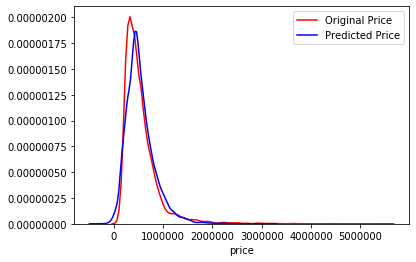

In [41]:
axl=sns.distplot(df['price'],hist=False,color="r",label="Original Price")
sns.distplot(yhat4,hist=False,color="b",label="Predicted Price",ax=axl)

# Model Evaluation 

In [42]:
from sklearn.metrics import mean_squared_error
print("model 1 MSE",mean_squared_error(df['price'], yhat1))
print("model 2 MSE",mean_squared_error(df['price'], yhat2))
print("model 3 MSE",mean_squared_error(df['price'], yhat3))
print("model 4 MSE",mean_squared_error(df['price'], yhat4))

model 1 MSE 65813940309.74542
model 2 MSE 43544943884.088165
model 3 MSE 26772383209.482555
model 4 MSE 43544910830.63973


In [43]:
from sklearn.metrics import r2_score
print("model 1 R squared",r2_score(df['price'], yhat1))
print("model 2 R squared",r2_score(df['price'], yhat2))
print("model 3 R squared",r2_score(df['price'], yhat3))
print("model 4 R squared",r2_score(df['price'], yhat4))

model 1 R squared 0.48818849973827383
model 2 R squared 0.6613665288351119
model 3 R squared 0.7918007408227141
model 4 R squared 0.6613667858799712


Best Model is 3

In [ ]:
scores=cross_val_score(model3,X_pr,y,cv=20000)

In [ ]:
print("Mean Scores of Polynomial Model with degree 3 ="+str(scores.mean()))

# Model With Pipeline

In [44]:
from sklearn.pipeline import Pipeline

In [ ]:
score=[]
degree=np.arange(1,8,1)
for d in degree:
    Input=[('scale',StandardScaler()),('poly',PolynomialFeatures(degree=d,include_bias=False)),('model',LinearRegression())]
    pipe=Pipeline(Input)
    xtr, xte, ytr, yte = train_test_split(Z, y, test_size=0.2, random_state=60)
    pipe.fit(xtr,ytr)
    score.append(["degree:"+str(d),pipe.score(xte,yte)])

In [ ]:
score